Diabetes is a type of chronic disease which is more common among the people of all age groups. Predicting this disease at an early stage can help of all age groups. Predicting this disease at an early stage can help a person to take the necessary precautions and change his/her lifestyle accordingly to either prevent the occurrence of this disease or control the disease(For people who already have the disease).

Task:
1. Prepare the data-set using several methods to train the model.
2. Build a model which can give high accuracy of predicting the disease.

1. Understanding the Problem and Dataset

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('/diabetes.csv')

# Show first 5 rows
print(df.head())
print(df.info())
print(df.isnull().sum())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

2. Data Cleaning & Preprocessing

In [3]:
import numpy as np

cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_fix:
    print(f"{col} has {(df[col] == 0).sum()} zero values")

for col in cols_to_fix:
    median_val = df[col].median()
    df[col] = df[col].replace(0, median_val)

print((df[cols_to_fix] == 0).sum())

Glucose has 5 zero values
BloodPressure has 35 zero values
SkinThickness has 227 zero values
Insulin has 374 zero values
BMI has 11 zero values
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


3. Exploratory Data Analysis (EDA)

    1. Distribution of Outcome (Target Variable)




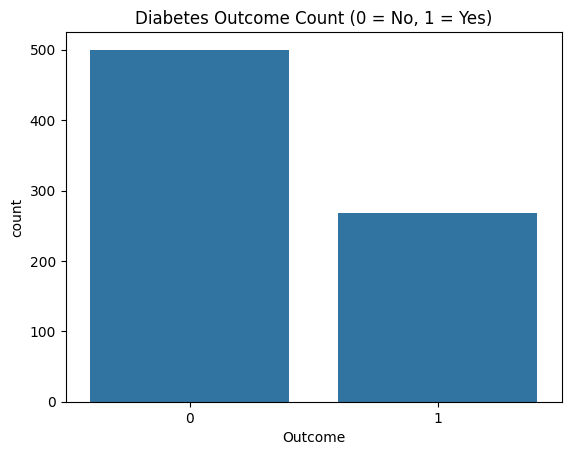

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Outcome Count (0 = No, 1 = Yes)')
plt.show()

2. Histograms for All Features

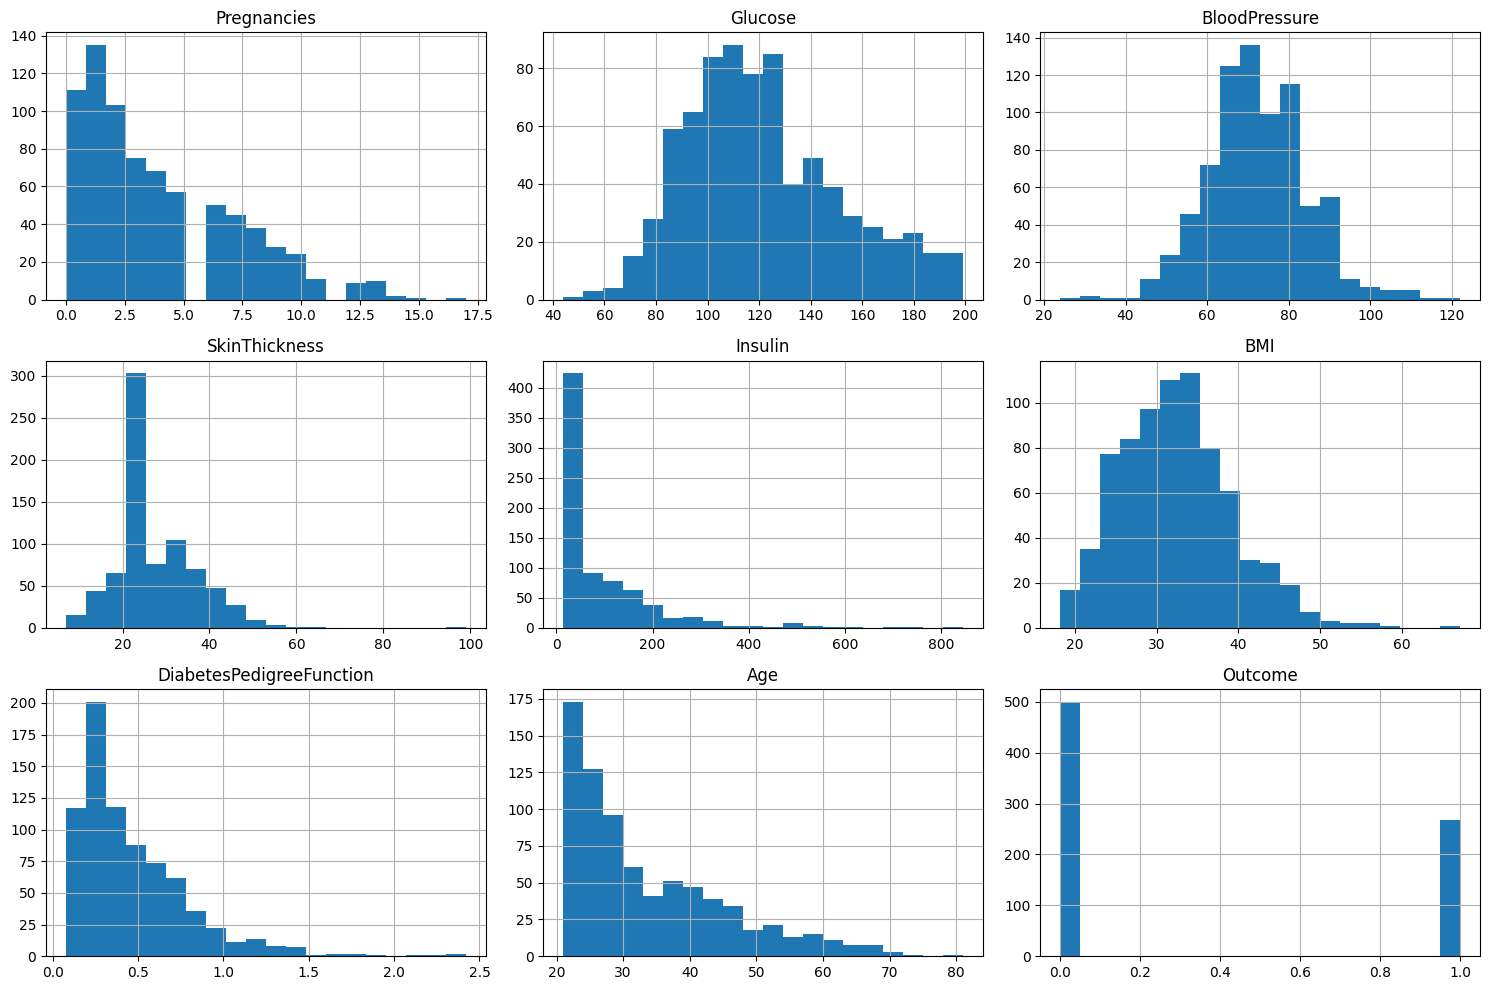

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

3. Correlation Heatmap

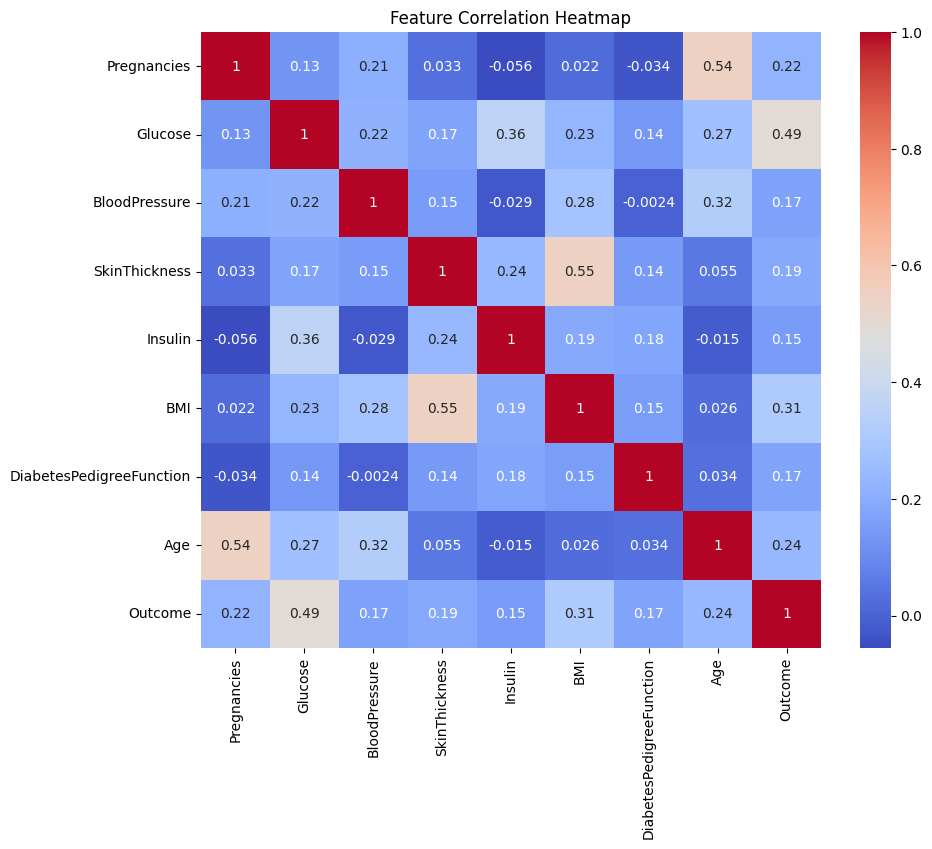

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

4. Feature Scaling & Splitting the Data

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split features and labels
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 2. Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

5. Model Building & Training
  Models used:
	1.	Logistic Regression (baseline)
	2.	K-Nearest Neighbors (KNN)
	3.	Random Forest Classifier
	4.	Support Vector Machine (SVM)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} - Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression - Accuracy: 0.7662
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154


K-Nearest Neighbors - Accuracy: 0.7532
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


Random Forest - Accuracy: 0.7727
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        99
           1       0.69      0.67      0.68        55

    accuracy                           0.77       154
   macro avg  

Random Forest Classifier — best accuracy and consistency across both classes.

6. Model Improvement (Hyperparameter Tuning)

In [10]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Evaluate
y_pred = best_rf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print(f"Best Random Forest Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Best Random Forest Accuracy: 0.7468
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



Tuned Random Forest model got:

	•	Accuracy: 0.7468
	•	F1-score for class 1 (diabetic): 0.64
	•	Performance dropped slightly compared to the default Random Forest (0.7727 accuracy).
  Conclusion:

    Model Version           Accuracy
    Random Forest (default) ✅ 0.7727
    Random Forest (tuned)       0.7468

  So for this project, we will use the default Random Forest, as it gives the best real-world performance.

 7. Saving & Using the Model

In [11]:
import joblib

# Save the trained model and scaler
joblib.dump(models["Random Forest"], 'diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved!")

Model and scaler saved!


8. Create a Simple Prediction Script

In [12]:
import joblib
import numpy as np

# Load the model and scaler
model = joblib.load('diabetes_model.pkl')
scaler = joblib.load('scaler.pkl')

# Sample input from user (in real-world: form or API)
# Format: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age]
user_input = [2, 120, 70, 25, 80, 32.0, 0.6, 30]

# Convert and scale
input_array = np.array(user_input).reshape(1, -1)
scaled_input = scaler.transform(input_array)

# Predict
prediction = model.predict(scaled_input)

# Output
if prediction[0] == 1:
    print("🔴 The person is likely to have diabetes.")
else:
    print("🟢 The person is not likely to have diabetes.")

🟢 The person is not likely to have diabetes.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


9. Create a Web App Using Streamlit

do all this localy after saving the dataset,model and scaler

In [ ]:
pip install streamlit

Create a file app.py

In [ ]:
import streamlit as st
import joblib
import numpy as np

# Load model and scaler
model = joblib.load('diabetes_model.pkl')
scaler = joblib.load('scaler.pkl')

st.title("🩺 Diabetes Prediction App")

st.markdown("### Enter patient details:")

# Form inputs
pregnancies = st.number_input("Pregnancies", min_value=0, max_value=20, value=1)
glucose = st.number_input("Glucose", min_value=0, max_value=200, value=120)
bp = st.number_input("Blood Pressure", min_value=0, max_value=150, value=70)
skin = st.number_input("Skin Thickness", min_value=0, max_value=100, value=20)
insulin = st.number_input("Insulin", min_value=0, max_value=900, value=80)
bmi = st.number_input("BMI", min_value=0.0, max_value=70.0, value=30.0)
dpf = st.number_input("Diabetes Pedigree Function", min_value=0.0, max_value=3.0, value=0.5)
age = st.number_input("Age", min_value=1, max_value=120, value=30)

if st.button("Predict"):
    input_data = np.array([[pregnancies, glucose, bp, skin, insulin, bmi, dpf, age]])
    scaled_input = scaler.transform(input_data)
    prediction = model.predict(scaled_input)

    if prediction[0] == 1:
        st.error("🔴 The person is likely to have diabetes.")
    else:
        st.success("🟢 The person is not likely to have diabetes.")

Run the App Locally

In [ ]:
streamlit run app.py

10. Upload to Streamlit Cloud